In [1]:
import numpy as np 
from skimage.measure import regionprops
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os

# Image Processing


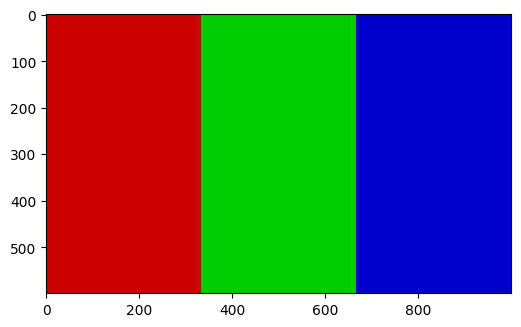

The shape of our RGB image is (600, 1000, 3)


In [2]:
#Image reading and Displaying

img = mpimg.imread(os.getcwd()+'/ims/rgb1.jpeg')

plt.figure(dpi=100)
plt.imshow(img[:,:])
plt.show()
print ('The shape of our RGB image is', img.shape)

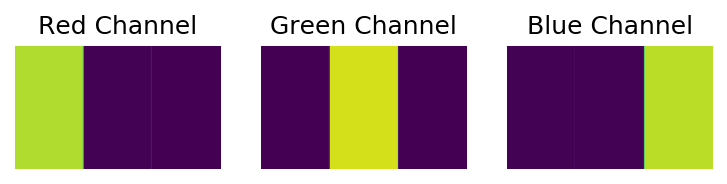

In [3]:
#
#only red
im_r = img[:,:,0]
#only green
im_g= img[:,:,1]
#only blue
im_b = img[:,:,2]
fig,ax = plt.subplots(1,3,dpi=150)
ax[0].imshow(im_r); ax[1].imshow(im_g); ax[2].imshow(im_b);
ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off');
ax[0].set_title('Red Channel'); ax[1].set_title('Green Channel'); ax[2].set_title('Blue Channel')
plt.show()

(600, 1000, 4)


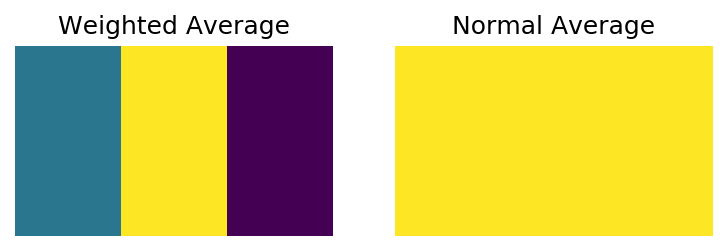

In [4]:
#Combining RGB
img = mpimg.imread(os.getcwd()+'/ims/rgb1.png')

print  (img.shape)

def rgb2gray(rgb):
    gray = np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return gray

fig,ax = plt.subplots(1,2,dpi=150)
im_c = rgb2gray(img)
ax[0].imshow(im_c)
im_av = np.mean(img,2)
ax[1].imshow(im_av)

ax[0].axis('off'); ax[1].axis('off'); 
ax[0].set_title('Weighted Average'); ax[1].set_title('Normal Average');

plt.show()

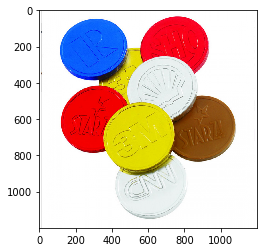

In [5]:
img_coin = mpimg.imread(os.getcwd()+'/ims/coins.jpg')
plt.imshow(img_coin)
# plt.savefig(fname, dpi=200)
plt.show()

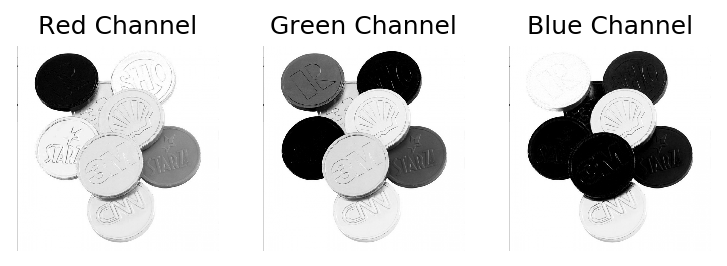

In [6]:
#Convert to greyscale
plt.rcParams['image.cmap'] = 'gray'


#only red
im_r = img_coin[:,:,0]
#only green
im_g= img_coin[:,:,1]
#only blue
im_b = img_coin[:,:,2]
fig,ax = plt.subplots(1,3,dpi=150)
ax[0].imshow(im_r); ax[1].imshow(im_g); ax[2].imshow(im_b);
ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off');
ax[0].set_title('Red Channel'); ax[1].set_title('Green Channel'); ax[2].set_title('Blue Channel')
plt.show()

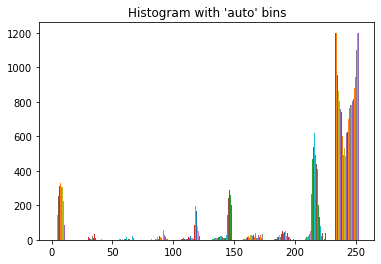

In [7]:
# Histograms are very useful for observing the distribution of intensities in a grey-scale image
_ = plt.hist(im_r, bins=10)
plt.title("Histogram with 'auto' bins")
plt.show()

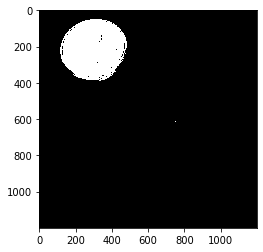

In [8]:
im1 = im_r.copy()
im1[im1<30]=0
im1[im1!=0]=1
plt.imshow(1-im1)

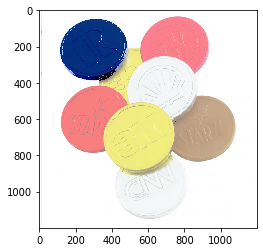

In [9]:
plt.figure()
plt.imshow(img_coin)
plt.imshow(im1,cmap='gnuplot2',alpha = 0.5)
plt.show()

# Image Filtering

In [10]:
from scipy import ndimage

In [11]:
img = mpimg.imread(os.getcwd()+'/ims/Dead_tree_salt_and_pepper.png')

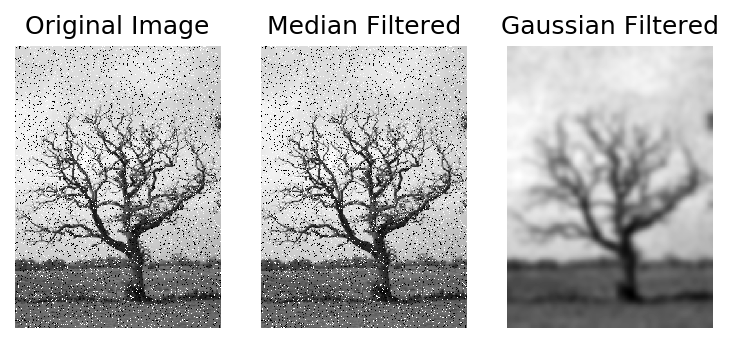

In [12]:
plt.rcParams['image.cmap'] = 'gray'
fig,ax = plt.subplots(1,3,dpi=150)
#Median Filtering
im_med = ndimage.median_filter(img, size=1)
#Gaussian Filtering
im_gau = ndimage.gaussian_filter(img, sigma=5)

ax[0].imshow(img); ax[1].imshow(im_med); ax[2].imshow(im_gau);
ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off');
ax[0].set_title('Original Image'); ax[1].set_title('Median Filtered'); ax[2].set_title('Gaussian Filtered')
plt.show()

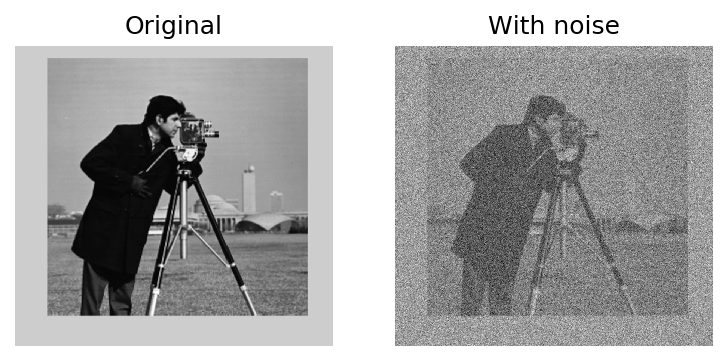

In [13]:
from skimage.color import rgb2gray
im = rgb2gray(mpimg.imread(os.getcwd()+'/ims/original-cameraman-image.png'))
#image source: https://www.researchgate.net/figure/The-original-image-of-Cameraman_fig1_282716754
noise = 0.25 * np.random.randn(im.shape[0],im.shape[1]);
corrupted = im + noise
fig,ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(im)
ax[1].imshow(corrupted)

ax[0].axis('off'); ax[1].axis('off'); 
ax[0].set_title('Original'); ax[1].set_title('With noise');

plt.show()


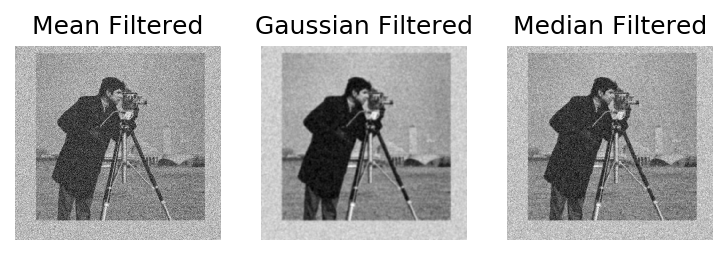

In [14]:
M_a = np.ones((3,3)); # Average Mask
mean_filtered = ndimage.filters.convolve(corrupted,M_a,mode='reflect');
fig,ax = plt.subplots(1,3,dpi=150)
#Median Filtering
im_med = ndimage.median_filter(corrupted, size=5)
#Gaussian Filtering
im_gau = ndimage.gaussian_filter(corrupted, sigma=3)

ax[0].imshow(mean_filtered); ax[1].imshow(im_gau); ax[2].imshow(im_med);
ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off');
ax[0].set_title('Mean Filtered'); ax[1].set_title('Gaussian Filtered'); ax[2].set_title('Median Filtered')
plt.show()

In [15]:
# Task1: Investigate the effects of changing the filter parameters for the median and gaussian filters
# then choose your optimal parameters
#Task2: Test how applying the same chosen filter multiple times affect the result


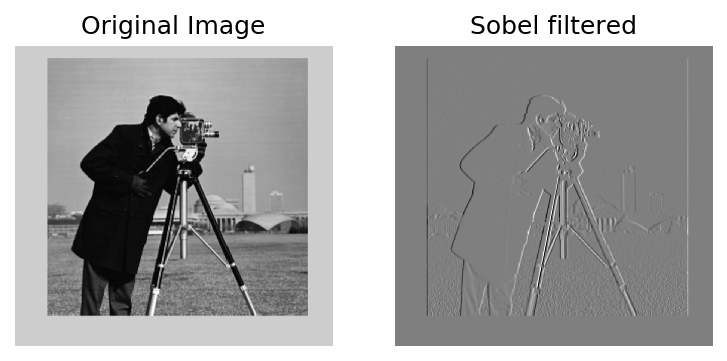

In [16]:
#Sobel Filter (edge enhancement)
from skimage.color import rgb2gray
im = rgb2gray(mpimg.imread(os.getcwd()+'/ims/original-cameraman-image.png'))
im_s = ndimage.sobel(im)

fig,ax = plt.subplots(1,2,dpi=150)

ax[0].imshow(im); ax[1].imshow(im_s); 
ax[0].axis('off'); ax[1].axis('off');
ax[0].set_title('Original Image'); ax[1].set_title('Sobel filtered'); 
plt.show()

# MNIST

In [ ]:
from sklearn.datasets import fetch_openml
import os
data_path = os.getcwd()+"/datasets"
X, y = fetch_openml('mnist_784', version=1, return_X_y=True,data_home=data_path)